# Basic EDA on character sizes

Just some quick exploratory analysis to describe the number of characters per book, the distribution of characters across sizes, and the relation of the largest character to median size.

In [5]:
from collections import Counter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
bio = pd.read_csv('biocharsizes.tsv', sep = '\t')
bio.shape

(7935075, 4)

In [3]:
bio = bio[bio.totalsize > 0]
bio.shape

(5532140, 4)

In [49]:
bio.head()

,story,totalsize,dialsize,gender
0,uc1.b4362903,26,0,m
2,uc1.b4362903,8,0,m
3,uc1.b4362903,8,0,m
4,uc1.b4362903,1,0,m
5,uc1.b4362903,2,0,u


In [85]:
signibio = bio.gender[bio.totalsize > 10]
sum(signibio == 'f') / (sum(signibio == 'm') + sum(signibio == 'f'))

0.12794749473096245

In [4]:
numchars = []
ratios = []

stories = bio.groupby('story')
for story, df in stories:
    numchars.append(len(df))
    maxsize = np.max(df.totalsize)
    mediansize = np.median(df.totalsize)
    maxratio = maxsize/mediansize
    if mediansize > 0:
        ratios.append(maxratio)


In [70]:
n = 20000
counts = Counter(bio.totalsize[bio.totalsize < n])
y = np.zeros(n -1)
for i in range(1, n):
    y[i - 1] = counts[i]

x = np.array([i for i in range(1, n)])
y = y * x
y = y /np.sum(y)


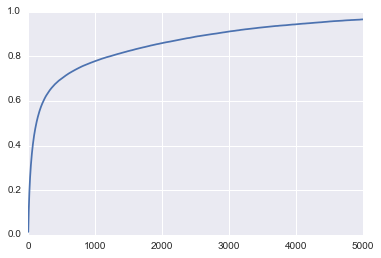

In [71]:
plt.plot(x[0:5000], np.cumsum(y[0:5000]))

In [31]:
np.median(ratios)

139.71428571428572

In [27]:
numchars = np.array(numchars)

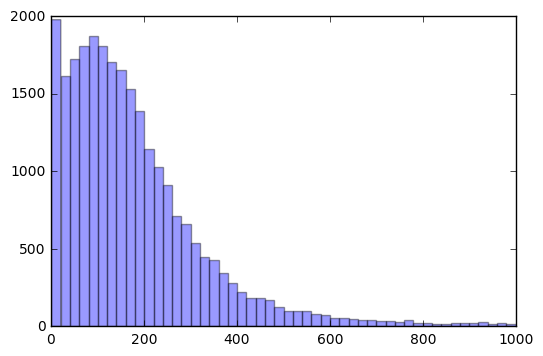

In [29]:
sns.distplot(numchars[numchars < 1000], kde = False)

/Users/tunder/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


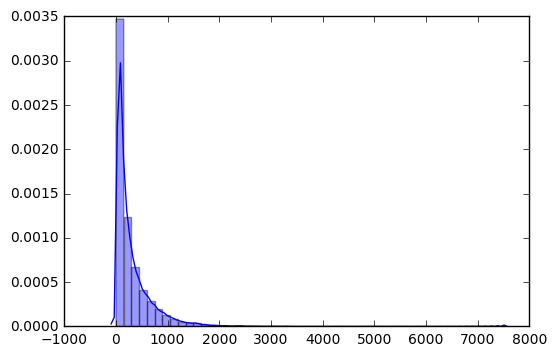

In [30]:
ratios = np.array(ratios)
sns.distplot(ratios)

In [32]:
np.median(numchars)

147.0

In [16]:
fic = pd.read_csv('ficcharsizes.tsv', sep = '\t')
fic.shape

/Users/tunder/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10391691, 4)

In [17]:
fic = fic[fic.totalsize > 0]
fic.shape

(9073945, 4)

In [86]:
signific = fic.gender[fic.totalsize > 10]

In [87]:
sum(signific == 'f') / (sum(signific == 'm') + sum(signific == 'f'))

0.31297686666474733

In [29]:
n = 2000
counts = Counter(fic.totalsize[fic.totalsize < n])
y = np.zeros(n -1)
for i in range(1, n):
    y[i - 1] = counts[i]

x = np.array([i for i in range(1, n)])
y = y * x
y = y /np.sum(y)

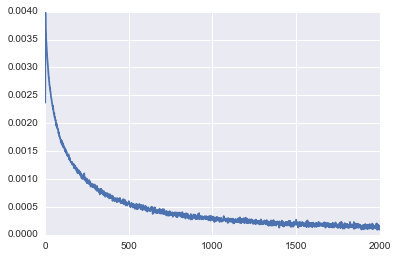

In [30]:
plt.plot(x, y)

In [31]:
total = 0
for idx, y1 in enumerate(y):
    total += y1
    if total > 0.5:
        print(idx)
        break
    
    

339


In [36]:
ficnumchars = []
ficratios = []

stories = fic.groupby('story')
for story, df in stories:
    ficnumchars.append(len(df))
    maxsize = np.max(df.totalsize)
    mediansize = np.median(df.totalsize)
    maxratio = maxsize/mediansize
    if mediansize > 0:
        ficratios.append(maxratio)

In [55]:
n = 5000
counts = Counter(ficnumchars)
y = np.zeros(n -1)
for i in range(1, n):
    y[i - 1] = counts[i]

x = np.array([i for i in range(1, n)])
y = y * x
y = y /np.sum(y)

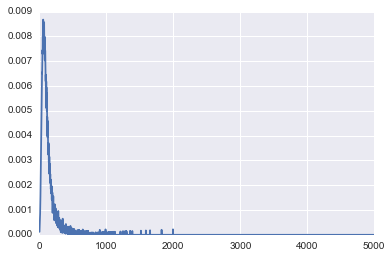

In [56]:
plt.plot(x, y)

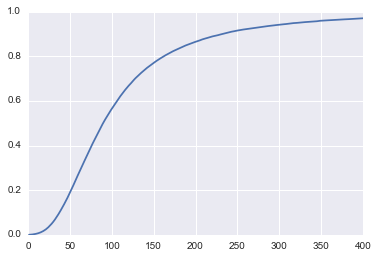

In [58]:
plt.plot(x[0:400], np.cumsum(y[0:400]))

In [47]:
total = 0
for idx, y1 in enumerate(y):
    total += y1
    if total > 0.5:
        print(idx)
        break

89


In [39]:
np.mean(ficnumchars)

68.137033310305469

In [72]:
np.mean(numchars)

91.677085883216904

In [40]:
np.mean(ficratios)

157.08226014619919

In [43]:
np.mean(fic.totalsize)

73.271037239039913

In [44]:
np.mean(bio.totalsize)

18.910743762811499

In [73]:
np.sum(fic.dialsize)/np.sum(fic.totalsize)

0.37960059469116625

In [74]:
np.sum(bio.dialsize)/np.sum(bio.totalsize)

0.34604750502887288

In [81]:
biodial = bio.dialsize[bio.totalsize > 10]
sum(biodial == 0) / len(biodial)

0.3875560961594276

In [82]:
ficdial = fic.dialsize[fic.totalsize > 10]
sum(ficdial == 0) / len(ficdial)

0.2926395783982738

In [83]:
sum(fic.totalsize[fic.totalsize > 10]) / sum(fic.totalsize)

0.9729435424376033

In [84]:
sum(bio.totalsize[bio.totalsize > 10]) / sum(bio.totalsize)

0.8726908052946942